In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
# Problem 13
rng = np.random.default_rng(1)
# 100 observations, N(0,1)
x = rng.normal(size=100)
# 100 observations, N(0,0.25)
eps = rng.normal(size=100, scale = 0.5)

In [11]:
# Length 100, B_0 = -1, B_1 = 0.5
y = -1 + 0.5*x + eps

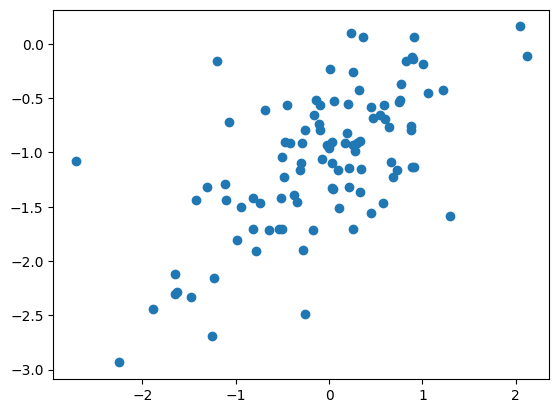

In [21]:
plt.scatter(x,y);


In [37]:
df = pd.DataFrame({'x':x, 'y':y})
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Wed, 22 May 2024   Prob (F-statistic):           8.04e-13
Time:                        11:41:46   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0380      0.050    -20.647      0.000      -1.138      -0.938
x              0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

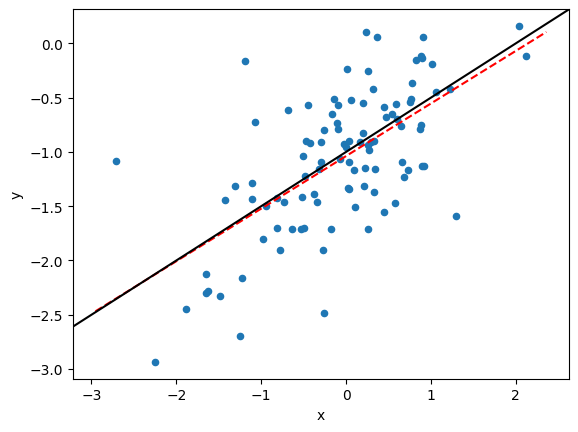

In [55]:
# Here, B_0^ = -1.038 and B_1^ = 0.4843
ax = df.plot.scatter('x','y');

def abline(ax,b,m, *args, **kwargs): # args any number of non-named args, kwargs allows any number of named args
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
# Regression line
abline(ax, reg.params[0], reg.params[1],'r--')
# Population line
ax.axline([0,-1],slope=0.5,color='k');

In [59]:
# Quadratic term did not signifcantly improve fit, it's p valie is 0.96
reg2 = smf.ols('y~x+I(x**2)',df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     33.55
Date:                Wed, 22 May 2024   Prob (F-statistic):           8.42e-12
Time:                        12:02:48   Log-Likelihood:                -71.744
No. Observations:                 100   AIC:                             149.5
Df Residuals:                      97   BIC:                             157.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0364      0.060    -17.399      0.000      -1.155      -0.918
x              0.4831      0.063      7.647      0.000       0.358       0.609
I(x ** 2)     -0.0024      0.045     -0.052      0.959      -0.092       0.088
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Doing same regression with less noisy data
eps = rng.normal(size=100, scale = 0.35)
y = -1 + 0.5 * x + eps